In [1]:
import pandas as pd
import numpy as np
import missingno
import fuzzywuzzy
from fuzzywuzzy import process
import collections
import matplotlib.pyplot as plt
import xlrd
import openpyxl

c:\python\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
adidas = pd.read_excel(r'C:\Users\saman\Desktop\nike vs adidas\Adidas_final.xlsx')

In [3]:
adidas.head()

,URL,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Images,Last Visited
0,https://shop.adidas.co.in/#!product/AH2430_nmd...,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,ORIGINALS,Channeling the streamlined look of an '80s rac...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:14
1,https://shop.adidas.co.in/#!product/G27341_adi...,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,ORIGINALS,"A modern take on adidas sport heritage, tailor...",0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:15
2,https://shop.adidas.co.in/#!product/CM0081_pukaws,Women's adidas Swim Puka Slippers,CM0081,999,599,40,CORE / NEO,These adidas Puka slippers for women's come wi...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:15
3,https://shop.adidas.co.in/#!product/B44832_que...,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,CORE / NEO,"Inspired by modern tech runners, these women's...",0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:15
4,https://shop.adidas.co.in/#!product/D98205_tae...,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,ORIGINALS,This design is inspired by vintage Taekwondo s...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:15


In [4]:
adi = adidas.drop(columns=['URL'])
adi

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Images,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,ORIGINALS,Channeling the streamlined look of an '80s rac...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,ORIGINALS,"A modern take on adidas sport heritage, tailor...",0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,CORE / NEO,These adidas Puka slippers for women's come wi...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,CORE / NEO,"Inspired by modern tech runners, these women's...",0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,ORIGINALS,This design is inspired by vintage Taekwondo s...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:15
...,...,...,...,...,...,...,...,...,...,...,...
2620,Men's adidas Adipower Vector 20 Shoes,EF3503,10999,10999,0,SPORT PERFORMANCE,It's just you and the batsman. As you steam to...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:59
2621,Men's adidas Cricket Howzat Shoes,EF3505,6999,6999,0,SPORT PERFORMANCE,"Batting, fielding or bowling, these Howzat Spi...",0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:59
2622,Men's Cricket Cri Hase Shoes,CM6008,3999,3999,0,SPORT PERFORMANCE,Thiese shoes are a great choice for the amatue...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:59
2623,Unisex adidas Outdoor Terrex Daroga Water Shoes,BC0980,7999,7999,0,SPORT PERFORMANCE,These shoes fit easily into a travel bag so yo...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:59


In [5]:
adi.isnull()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Images,Last Visited
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2620,False,False,False,False,False,False,False,False,False,False,False
2621,False,False,False,False,False,False,False,False,False,False,False
2622,False,False,False,False,False,False,False,False,False,False,False
2623,False,False,False,False,False,False,False,False,False,False,False


In [6]:
for col in adi.columns:
    pct_missing = adi[col].isnull().mean()
    print(f'{col} - {pct_missing :.1%}')

Product Name - 0.0%
Product ID - 0.0%
Listing Price - 0.0%
Sale Price - 0.0%
Discount - 0.0%
Brand - 0.0%
Description - 0.0%
Rating - 0.0%
Reviews - 0.0%
Images - 0.0%
Last Visited - 0.0%


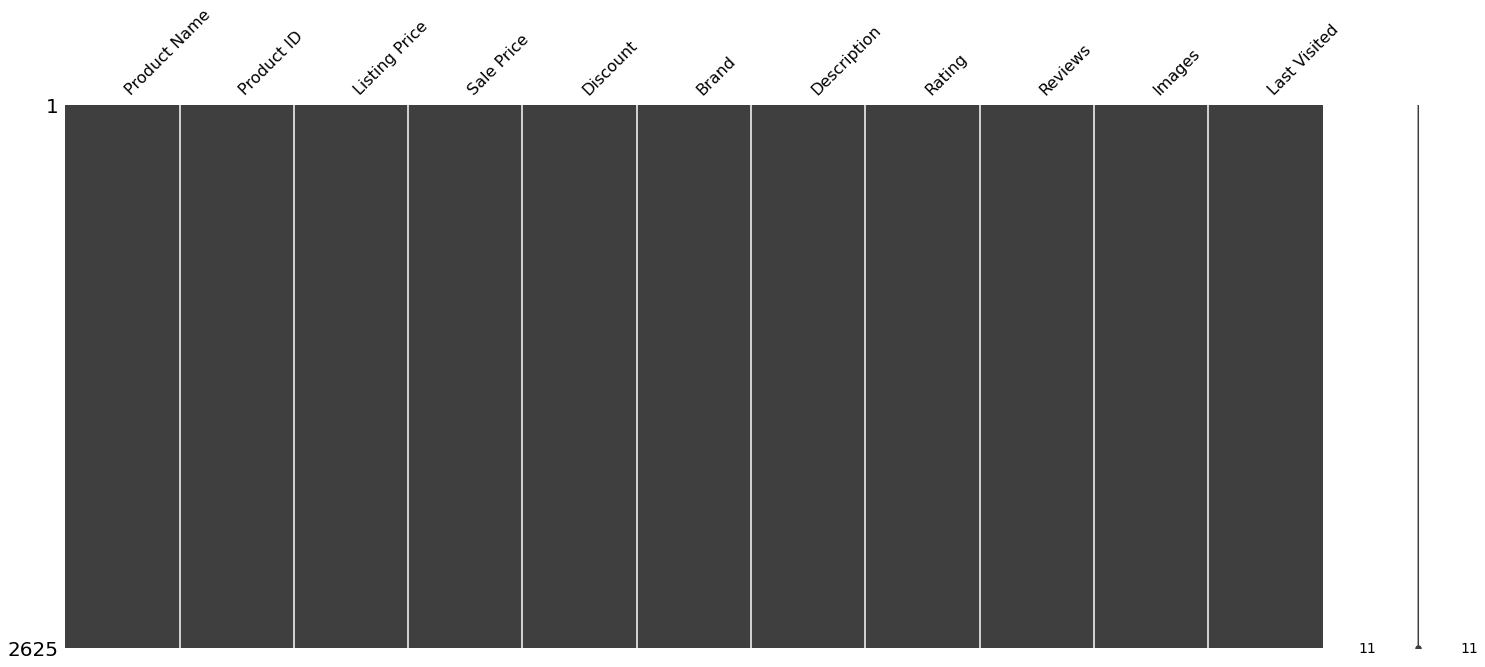

In [7]:
missingno.matrix(adi, fontsize = 16)
plt.show()

In [8]:
adi.head(10)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Images,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,ORIGINALS,Channeling the streamlined look of an '80s rac...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,ORIGINALS,"A modern take on adidas sport heritage, tailor...",0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,CORE / NEO,These adidas Puka slippers for women's come wi...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,CORE / NEO,"Inspired by modern tech runners, these women's...",0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,ORIGINALS,This design is inspired by vintage Taekwondo s...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:15
5,Women's adidas Sport Inspired Duramo Lite 2.0 ...,B75586,4799,1920,60,CORE / NEO,Refine your interval training in these women's...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:15
6,Women's adidas Sport Inspired Duramo Lite 2.0 ...,CG4051,4799,2399,50,CORE / NEO,Refine your interval training in these women's...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:15
7,Women's adidas Swim Puka Slippers,CM0080,999,599,40,CORE / NEO,These adidas Puka slippers for women's come wi...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:15
8,WOMEN'S ADIDAS RUNNING DURAMO 9 SHOES,B75990,5599,2799,50,CORE / NEO,These women's neutral running shoes will get y...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:15
9,Men's adidas Originals Forest Grove Shoes,EE5761,6599,3959,40,ORIGINALS,The Forest Grove brings back the look of the a...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:15


In [9]:
adi.shape

(2625, 11)

In [10]:
new_adi = adi.sort_values('Sale Price', ascending=False)
adi.head(20)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Images,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,ORIGINALS,Channeling the streamlined look of an '80s rac...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,ORIGINALS,"A modern take on adidas sport heritage, tailor...",0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,CORE / NEO,These adidas Puka slippers for women's come wi...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,CORE / NEO,"Inspired by modern tech runners, these women's...",0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,ORIGINALS,This design is inspired by vintage Taekwondo s...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:15
5,Women's adidas Sport Inspired Duramo Lite 2.0 ...,B75586,4799,1920,60,CORE / NEO,Refine your interval training in these women's...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:15
6,Women's adidas Sport Inspired Duramo Lite 2.0 ...,CG4051,4799,2399,50,CORE / NEO,Refine your interval training in these women's...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:15
7,Women's adidas Swim Puka Slippers,CM0080,999,599,40,CORE / NEO,These adidas Puka slippers for women's come wi...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:15
8,WOMEN'S ADIDAS RUNNING DURAMO 9 SHOES,B75990,5599,2799,50,CORE / NEO,These women's neutral running shoes will get y...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:15
9,Men's adidas Originals Forest Grove Shoes,EE5761,6599,3959,40,ORIGINALS,The Forest Grove brings back the look of the a...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:15


In [11]:
new_adi.head(2)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Images,Last Visited
2554,Men's adidas Originals ZX 4000 4D Shoes,BD7927,29999,29999,0,ORIGINALS,"In the '80s, the science of sport and wearable...",0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:57
2579,Men's adidas Originals ZX 4000 4D Shoes,BD7865,29999,29999,0,ORIGINALS,"In the '80s, the science of sport and wearable...",0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:57


In [12]:
new_adi.tail(2)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Images,Last Visited
147,Women's adidas Swim Jung Slippers,CM0072,999,499,50,CORE / NEO,These adidas Jung slippers for women come with...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:24
2044,Men's adidas Swimming Beach Print Maxout Slippers,CL0233,899,449,50,CORE / NEO,These adidas Beach Print Maxout 2 slippers for...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:38


In [13]:
r_1 = new_adi[(new_adi['Sale Price'] <= 5000)]

In [14]:
r_1.count()

Product Name     1744
Product ID       1744
Listing Price    1744
Sale Price       1744
Discount         1744
Brand            1744
Description      1744
Rating           1744
Reviews          1744
Images           1744
Last Visited     1744
dtype: int64

In [15]:
r_1.describe()                                        #under 5000rs, 1744 products

,Listing Price,Sale Price,Discount,Rating,Reviews
count,1744.000000,1744.000000,1744.000000,1744.0,1744.0
mean,5606.052752,3222.015482,40.389908,0.0,0.0
std,1985.617137,1068.001660,15.621286,0.0,0.0
min,899.000000,449.000000,0.000000,0.0,0.0
25%,4599.000000,2400.000000,40.000000,0.0,0.0
50%,5599.000000,3094.500000,50.000000,0.0,0.0
75%,6999.000000,3999.000000,50.000000,0.0,0.0
max,11999.000000,4999.000000,60.000000,0.0,0.0


In [16]:
r_1.to_csv('less than 5k.csv')

In [17]:
r_2 = new_adi[(new_adi['Sale Price'] > 5000) & (new_adi['Sale Price'] <= 15000)]

In [18]:
r_2.describe()                                           #between5000-15000, 826 products

,Listing Price,Sale Price,Discount,Rating,Reviews
count,826.000000,826.000000,826.000000,826.0,826.0
mean,10980.234867,8177.053269,21.053269,0.0,0.0
std,3630.837476,2389.378558,21.952667,0.0,0.0
min,5299.000000,5159.000000,0.000000,0.0,0.0
25%,7999.000000,6424.750000,0.000000,0.0,0.0
50%,10999.000000,7599.000000,0.000000,0.0,0.0
75%,12999.000000,8999.000000,40.000000,0.0,0.0
max,22999.000000,14999.000000,60.000000,0.0,0.0


In [19]:
r_2.to_csv('between5k-15k.csv')

In [20]:
r_3 = new_adi[(new_adi['Sale Price'] > 15000) & (new_adi['Sale Price'] <= 25000)]

In [21]:
r_3.describe()                                                      #between 15000- 25000, 49 products

,Listing Price,Sale Price,Discount,Rating,Reviews
count,49.000000,49.000000,49.0,49.0,49.0
mean,19060.224490,19060.224490,0.0,0.0,0.0
std,2348.830944,2348.830944,0.0,0.0,0.0
min,15999.000000,15999.000000,0.0,0.0,0.0
25%,17999.000000,17999.000000,0.0,0.0,0.0
50%,17999.000000,17999.000000,0.0,0.0,0.0
75%,19999.000000,19999.000000,0.0,0.0,0.0
max,23999.000000,23999.000000,0.0,0.0,0.0


In [22]:
r_3.to_csv('between15k-25k.csv')

In [23]:
r_4 = new_adi[(new_adi['Sale Price'] > 25000)]

In [24]:
r_4.describe()                                                      #above 25000, 6 products             

,Listing Price,Sale Price,Discount,Rating,Reviews
count,6.000000,6.000000,6.0,6.0,6.0
mean,28665.666667,28665.666667,0.0,0.0,0.0
std,1032.795559,1032.795559,0.0,0.0,0.0
min,27999.000000,27999.000000,0.0,0.0,0.0
25%,27999.000000,27999.000000,0.0,0.0,0.0
50%,27999.000000,27999.000000,0.0,0.0,0.0
75%,29499.000000,29499.000000,0.0,0.0,0.0
max,29999.000000,29999.000000,0.0,0.0,0.0


In [25]:
r_4.to_csv('above 25k.csv')

In [26]:
discounted_adidas = new_adi[(new_adi['Listing Price'] > 0)]                   # 2625 products with discount
discounted_adidas

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Images,Last Visited
2554,Men's adidas Originals ZX 4000 4D Shoes,BD7927,29999,29999,0,ORIGINALS,"In the '80s, the science of sport and wearable...",0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:57
2579,Men's adidas Originals ZX 4000 4D Shoes,BD7865,29999,29999,0,ORIGINALS,"In the '80s, the science of sport and wearable...",0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:57
1438,Men's adidas Originals ZX 4000 4D Shoes,EF9625,27999,27999,0,ORIGINALS,Thousands of athletes. Years of data. adidas 4...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:11
1553,Men's adidas Originals ZX 4000 4D Shoes,EF9624,27999,27999,0,ORIGINALS,The ZX trainers series resets the running scen...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:16
1642,Unisex adidas Running Alphaedge 4D Shoes,FV6106,27999,27999,0,SPORT PERFORMANCE,Add an edge to your game with the new AlphaEdg...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:21
...,...,...,...,...,...,...,...,...,...,...,...
2493,Men's adidas Swim Eezay Maxout II Slippers,CM0105,999,499,50,CORE / NEO,These casual adidas slippers for men come with...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:54
2046,Men's adidas Swim Eezay Maxout II Slippers,CM0106,999,499,50,CORE / NEO,These casual adidas slippers for men come with...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:38
2420,Men's adidas Toe Side Slippers,CL0252,999,499,50,CORE / NEO,The adidas casual sandals for men. Features st...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:52
147,Women's adidas Swim Jung Slippers,CM0072,999,499,50,CORE / NEO,These adidas Jung slippers for women come with...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:24


In [27]:
discounted_adidas.to_csv('discount products.csv')

In [28]:
dis_1 = discounted_adidas[(discounted_adidas['Sale Price'] <= 5000) & (discounted_adidas['Listing Price'] > 0)]
dis_1

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Images,Last Visited
1480,Men's Running Ancho Shoes,CM4705,4999,4999,0,CORE / NEO,A well cushioned shoe with a fresher look that...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:13
742,WOMEN'S ADIDAS ORIGINALS EQT SUPPORT ADV SHOES,B37538,9999,4999,50,ORIGINALS,"A modern revamp of the '90s Equipment runner, ...",0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:44
1742,Men's adidas Sport Inspired Advantage Base Shoes,EE7690,4999,4999,0,CORE / NEO,A court look emerges on the streets. These sho...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:26
376,WOMEN'S ADIDAS RUNNING ASWEERUN SHOES,F36339,4999,4999,0,CORE / NEO,Aspire to greatness. These running shoes for w...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:32
421,Women's Sport Inspired Khoe Adapt Shoes,EG4175,4999,4999,0,CORE / NEO,Step into the street with a bold approach. The...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:33
...,...,...,...,...,...,...,...,...,...,...,...
2493,Men's adidas Swim Eezay Maxout II Slippers,CM0105,999,499,50,CORE / NEO,These casual adidas slippers for men come with...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:54
2046,Men's adidas Swim Eezay Maxout II Slippers,CM0106,999,499,50,CORE / NEO,These casual adidas slippers for men come with...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:38
2420,Men's adidas Toe Side Slippers,CL0252,999,499,50,CORE / NEO,The adidas casual sandals for men. Features st...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:52
147,Women's adidas Swim Jung Slippers,CM0072,999,499,50,CORE / NEO,These adidas Jung slippers for women come with...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:24


In [29]:
dis_1.describe()                                                #less than 5k, 1744 discounted products out of 1744 products

,Listing Price,Sale Price,Discount,Rating,Reviews
count,1744.000000,1744.000000,1744.000000,1744.0,1744.0
mean,5606.052752,3222.015482,40.389908,0.0,0.0
std,1985.617137,1068.001660,15.621286,0.0,0.0
min,899.000000,449.000000,0.000000,0.0,0.0
25%,4599.000000,2400.000000,40.000000,0.0,0.0
50%,5599.000000,3094.500000,50.000000,0.0,0.0
75%,6999.000000,3999.000000,50.000000,0.0,0.0
max,11999.000000,4999.000000,60.000000,0.0,0.0


In [30]:
dis_1.to_csv('discountedlessthan5k.csv')

In [31]:
dis_2 = discounted_adidas[(discounted_adidas['Sale Price'] > 5000) & (discounted_adidas['Sale Price'] <= 15000) & (discounted_adidas['Listing Price'] > 0)]
dis_2

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Images,Last Visited
1628,Women's adidas Running PulseBoost HD Shoes,EE4005,14999,14999,0,SPORT PERFORMANCE,"The city's full of surprises, but you can coun...",0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:20
2242,Men's adidas Running PulseBoost HD Shoes,EG0978,14999,14999,0,SPORT PERFORMANCE,Feel the energy of the city pulse as you run. ...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:45
1780,Men's adidas Originals White Mountaineering Ni...,EG1686,14999,14999,0,ORIGINALS,Japanese brand White Mountaineering brings cle...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:27
1641,Unisex adidas Running Pharrell Williams Solar ...,EG1837,14999,14999,0,SPORT PERFORMANCE,adidas teamed up with Pharrell Williams on the...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:21
2624,Men's adidas Basketball Harden Vol. 4 Shoes,EF9924,14999,14999,0,SPORT PERFORMANCE,These basketball shoes are designed specifical...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:59
...,...,...,...,...,...,...,...,...,...,...,...
1301,Men's adidas Running Lace It Shoes,CM4877,5299,5299,0,CORE / NEO,These men's running shoes keep you comfortable...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:06
2449,MEN'S ADIDAS ORIGINALS EQT SUPPORT MID ADV PRI...,B37435,12999,5200,60,ORIGINALS,"In the '90s, serious runners set the pace in E...",0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:53
1918,Men's adidas Originals SUPERSTAR 80S DECON Low...,BZ0109,12999,5200,60,ORIGINALS,"Born on the basketball court, the adidas Super...",0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:32
881,WOMEN'S ADIDAS ORIGINALS STAN SMITH SOCK PK SHOES,BY9250,12999,5200,60,ORIGINALS,"Just like its namesake, the Stan Smith shoe ro...",0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:49


In [32]:
dis_2.describe()                                            #between 5k and 15k, 826 products discounted out of 826

,Listing Price,Sale Price,Discount,Rating,Reviews
count,826.000000,826.000000,826.000000,826.0,826.0
mean,10980.234867,8177.053269,21.053269,0.0,0.0
std,3630.837476,2389.378558,21.952667,0.0,0.0
min,5299.000000,5159.000000,0.000000,0.0,0.0
25%,7999.000000,6424.750000,0.000000,0.0,0.0
50%,10999.000000,7599.000000,0.000000,0.0,0.0
75%,12999.000000,8999.000000,40.000000,0.0,0.0
max,22999.000000,14999.000000,60.000000,0.0,0.0


In [33]:
dis_2.to_csv('discountedbetween5k-15k.csv')

In [34]:
dis_3 = discounted_adidas[(discounted_adidas['Sale Price'] > 15000) & (discounted_adidas['Sale Price'] <= 25000) & (discounted_adidas['Listing Price'] > 0)]
dis_3

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Images,Last Visited
1334,Unisex Originals CRAIG GREEN KONTUUR I SHOES,FV4419,23999,23999,0,ORIGINALS,Live for the unpredictable. London-born design...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:08
1614,Unisex adidas Originals by Alexander Wang Puff...,EG4901,23999,23999,0,ORIGINALS,Known for his playful aesthetic and party-read...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:20
1328,Unisex Originals CRAIG GREEN KONTUUR II SHOES,FV7825,23999,23999,0,ORIGINALS,Go for the unexpected. British designer Craig ...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:07
1326,Unisex Originals CRAIG GREEN KONTUUR II SHOES,FV7826,23999,23999,0,ORIGINALS,Go for the unexpected. British designer Craig ...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:07
1591,Unisex Originals CRAIG GREEN KONTUUR I SHOES,FV6794,23999,23999,0,ORIGINALS,Live for the unpredictable. London-born design...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:18
1632,Unisex Football Predator Mutator 20+ Firm Grou...,EF1565,22999,22999,0,SPORT PERFORMANCE,You're not cheating the system. You're just be...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:20
2405,Men's Originals White Mountaineering Lxcon Shoes,FV7538,21999,21999,0,ORIGINALS,Sophistication meets utility. Japanese brand W...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:51
1382,UNISEX adidas Originals Pharrell Williams Hu N...,EG7737,21999,21999,0,ORIGINALS,Pairing vibrant colours with words that honour...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:09
1377,UNISEX adidas Originals Pharrell Williams Hu N...,EF2335,21999,21999,0,ORIGINALS,Pairing vibrant colours with words that honour...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:09
2410,Men's Originals White Mountaineering Lxcon Shoes,FV7536,21999,21999,0,ORIGINALS,Sophistication meets utility. Japanese brand W...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:52


In [35]:
dis_3.describe()                                          #between 15k and 25k, 49 products discounted out of 49

,Listing Price,Sale Price,Discount,Rating,Reviews
count,49.000000,49.000000,49.0,49.0,49.0
mean,19060.224490,19060.224490,0.0,0.0,0.0
std,2348.830944,2348.830944,0.0,0.0,0.0
min,15999.000000,15999.000000,0.0,0.0,0.0
25%,17999.000000,17999.000000,0.0,0.0,0.0
50%,17999.000000,17999.000000,0.0,0.0,0.0
75%,19999.000000,19999.000000,0.0,0.0,0.0
max,23999.000000,23999.000000,0.0,0.0,0.0


In [36]:
dis_3.to_csv('discountedbetween15k-25k.csv')

In [37]:
dis_4 = discounted_adidas[(discounted_adidas['Sale Price'] > 25000) & (discounted_adidas['Listing Price'] > 0)]
dis_4

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Images,Last Visited
2554,Men's adidas Originals ZX 4000 4D Shoes,BD7927,29999,29999,0,ORIGINALS,"In the '80s, the science of sport and wearable...",0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:57
2579,Men's adidas Originals ZX 4000 4D Shoes,BD7865,29999,29999,0,ORIGINALS,"In the '80s, the science of sport and wearable...",0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:57
1438,Men's adidas Originals ZX 4000 4D Shoes,EF9625,27999,27999,0,ORIGINALS,Thousands of athletes. Years of data. adidas 4...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:11
1553,Men's adidas Originals ZX 4000 4D Shoes,EF9624,27999,27999,0,ORIGINALS,The ZX trainers series resets the running scen...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:16
1642,Unisex adidas Running Alphaedge 4D Shoes,FV6106,27999,27999,0,SPORT PERFORMANCE,Add an edge to your game with the new AlphaEdg...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:21
1563,Men's adidas Originals ZX 4000 4D Shoes,EF9623,27999,27999,0,ORIGINALS,The ZX trainers series resets the running scen...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:07:16


In [38]:
dis_4.describe()                                               # above 25k, 6 product discounted out of 6       

,Listing Price,Sale Price,Discount,Rating,Reviews
count,6.000000,6.000000,6.0,6.0,6.0
mean,28665.666667,28665.666667,0.0,0.0,0.0
std,1032.795559,1032.795559,0.0,0.0,0.0
min,27999.000000,27999.000000,0.0,0.0,0.0
25%,27999.000000,27999.000000,0.0,0.0,0.0
50%,27999.000000,27999.000000,0.0,0.0,0.0
75%,29499.000000,29499.000000,0.0,0.0,0.0
max,29999.000000,29999.000000,0.0,0.0,0.0


In [39]:
dis_4.to_csv('discountedabove25k.csv')

In [40]:
adidas_min = adi.min()
adidas_min

Product Name             Kid's Unisex adidas Originals X_PLR Shoes
Listing Price                                                  899
Sale Price                                                     449
Discount                                                         0
Brand                                                   CORE / NEO
Description      "We make a good team, my adidas and me." Alway...
Rating                                                           0
Reviews                                                          0
Images           ["https://content.adidas.co.in/static/Product-...
Last Visited                                   2020-04-13T15:06:14
dtype: object

In [41]:
adidas_min.to_csv('lowest price nike.csv')

In [42]:
adidas_max = adi.max()
adidas_max

Product Name     men's adidas originals NEIGHBORHOOD CHOP SHOP ...
Listing Price                                                29999
Sale Price                                                   29999
Discount                                                        60
Brand                                            SPORT PERFORMANCE
Description      adidas teams up with skate brand Numbers Editi...
Rating                                                           0
Reviews                                                          0
Images           ["https://content.adidas.co.in/static/Product-...
Last Visited                                   2020-04-13T15:07:59
dtype: object

In [43]:
adidas_max.to_csv('highest price adidas.csv')

In [44]:
adi.to_csv('clean_data_adidas.csv')